# Import Libraries

In [1]:
# pandas for data manipuation
import pandas as pd

# Turn off iscopy warnings
pd.options.mode.chained_assignment = None

# matplotlib for data visualization; functions on pyplot
import matplotlib.pyplot as plt

# display graphs inine
%matplotlib inline
plt.style.use('ggplot')

# Data Ingestion

In [2]:
# Import the akas data
akas_df = pd.read_csv('data/title.akas.tsv.gz', sep='\t', low_memory=False)

# Review first few records to verify import
akas_df

,titleId,ordering,title,region,language,types,attributes,isOriginalTitle
0,tt0000001,1,Карменсіта,UA,\N,imdbDisplay,\N,0
1,tt0000001,2,Carmencita,DE,\N,\N,literal title,0
2,tt0000001,3,Carmencita - spanyol tánc,HU,\N,imdbDisplay,\N,0
3,tt0000001,4,Καρμενσίτα,GR,\N,imdbDisplay,\N,0
4,tt0000001,5,Карменсита,RU,\N,imdbDisplay,\N,0
...,...,...,...,...,...,...,...,...
26091847,tt9916852,4,エピソード #3.20,JP,ja,\N,\N,0
26091848,tt9916852,5,Episódio #3.20,PT,pt,\N,\N,0
26091849,tt9916852,6,Episodio #3.20,IT,it,\N,\N,0
26091850,tt9916852,7,एपिसोड #3.20,IN,hi,\N,\N,0


In [3]:
akas_df.shape

(26091852, 8)

In [4]:
# Import the basics data
basics_df = pd.read_csv('data/title.basics.tsv.gz', sep='\t', na_values=['\\N'], low_memory=False)

# Review first few records to verify import
basics_df

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0.0,1894.0,NaN,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0.0,1892.0,NaN,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0.0,1892.0,NaN,4,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0.0,1892.0,NaN,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0.0,1893.0,NaN,1,"Comedy,Short"
...,...,...,...,...,...,...,...,...,...
7853556,tt9916848,tvEpisode,Episode #3.17,Episode #3.17,0.0,2010.0,NaN,NaN,"Action,Drama,Family"
7853557,tt9916850,tvEpisode,Episode #3.19,Episode #3.19,0.0,2010.0,NaN,NaN,"Action,Drama,Family"
7853558,tt9916852,tvEpisode,Episode #3.20,Episode #3.20,0.0,2010.0,NaN,NaN,"Action,Drama,Family"
7853559,tt9916856,short,The Wind,The Wind,0.0,2015.0,NaN,27,Short


In [5]:
basics_df.shape

(7853561, 9)

In [6]:
# Import the ratings data
ratings_df = pd.read_csv('data/title.ratings.tsv.gz', sep='\t', na_values=['\\N'], low_memory=False)

# Review first few records to verify import
ratings_df

,tconst,averageRating,numVotes
0,tt0000001,5.7,1698
1,tt0000002,6.1,210
2,tt0000003,6.5,1454
3,tt0000004,6.1,123
4,tt0000005,6.1,2252
...,...,...,...
1146216,tt9916682,5.6,5
1146217,tt9916690,6.6,5
1146218,tt9916720,6.4,78
1146219,tt9916766,6.9,16


In [7]:
ratings_df.shape

(1146221, 3)

# Data Transformation

In [8]:
# Transform the akas data
akas_df = akas_df[(akas_df['isOriginalTitle'] == '1')].reset_index()
akas_df = akas_df[['titleId', 'title']]
print(akas_df.dtypes)
akas_df

titleId    object
title      object
dtype: object


,titleId,title
0,tt0000001,Carmencita
1,tt0000002,Le clown et ses chiens
2,tt0000003,Pauvre Pierrot
3,tt0000004,Un bon bock
4,tt0000005,Blacksmith Scene
...,...,...
550966,tt9916362,Akelarre
550967,tt9916428,Hong xing zhao yao Zhong guo
550968,tt9916460,Pink Taxi
550969,tt9916678,Acelerados


In [9]:
# Transform the basics data
basics_df = basics_df[(basics_df['titleType'] == 'movie')]
basics_df = basics_df[['tconst', 'startYear', 'runtimeMinutes']]
basics_df = basics_df.rename(columns={'tconst': 'titleId'})
basics_df = basics_df.dropna()
basics_df = basics_df.astype({'startYear': 'int64', 'runtimeMinutes': 'int64'})
print(basics_df.dtypes)
basics_df

titleId           object
startYear          int64
runtimeMinutes     int64
dtype: object


,titleId,startYear,runtimeMinutes
498,tt0000502,1905,100
570,tt0000574,1906,70
587,tt0000591,1907,90
672,tt0000679,1908,120
1172,tt0001184,1910,58
...,...,...,...
7853409,tt9916538,2019,123
7853450,tt9916622,2015,57
7853477,tt9916680,2007,100
7853500,tt9916730,2017,116


In [10]:
# Transform the ratings data
ratings_df = ratings_df[['tconst', 'averageRating']]
ratings_df = ratings_df.rename(columns={'tconst': 'titleId'})
print(ratings_df.dtypes)
ratings_df

titleId           object
averageRating    float64
dtype: object


,titleId,averageRating
0,tt0000001,5.7
1,tt0000002,6.1
2,tt0000003,6.5
3,tt0000004,6.1
4,tt0000005,6.1
...,...,...
1146216,tt9916682,5.6
1146217,tt9916690,6.6
1146218,tt9916720,6.4
1146219,tt9916766,6.9


In [11]:
# Merge all DataFrames into one
movies_df = akas_df.merge(basics_df, on='titleId')
movies_df = movies_df.merge(ratings_df, on='titleId')
print(movies_df.dtypes)
movies_df

titleId            object
title              object
startYear           int64
runtimeMinutes      int64
averageRating     float64
dtype: object


,titleId,title,startYear,runtimeMinutes,averageRating
0,tt0000574,The Story of the Kelly Gang,1906,70,6.1
1,tt0000591,L'enfant prodigue,1907,90,6.0
2,tt0001258,Den hvide slavehandel,1910,45,5.7
3,tt0001285,The Life of Moses,1909,50,5.4
4,tt0001498,The Battle of Trafalgar,1911,51,7.7
...,...,...,...,...,...
185329,tt9914942,La vida sense la Sara Amat,2019,74,6.8
185330,tt9915872,My Girlfriend is a Wizard,2019,97,7.3
185331,tt9916190,Safeguard,2020,90,3.4
185332,tt9916270,Il talento del calabrone,2020,84,5.7


# Data Inspection & Visualization

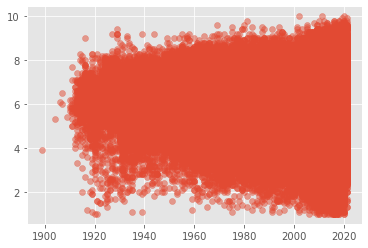

In [12]:
# create a scatter plots to get a better sense of the data
# startYear vs. averageRating
plt.scatter(movies_df.to_numpy()[:,2], movies_df.to_numpy()[:,4], alpha=0.5)
# wider range of ratings for more recent movies

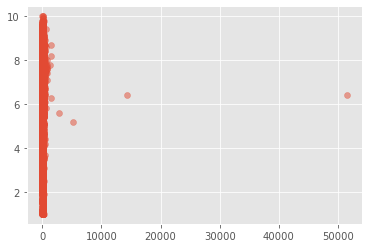

In [13]:
# runtimeMinutes vs. averageRating
plt.scatter(movies_df.to_numpy()[:,3], movies_df.to_numpy()[:,4], alpha=0.5)
# there are quite a few long movies and narrower range of ratings for relatively longer movies

# Training

In [14]:
# Remove titleId and title from DataFrame
movies_list = movies_df.drop(['titleId', 'title'], axis=1)
movies_list

,startYear,runtimeMinutes,averageRating
0,1906,70,6.1
1,1907,90,6.0
2,1910,45,5.7
3,1909,50,5.4
4,1911,51,7.7
...,...,...,...
185329,2019,74,6.8
185330,2019,97,7.3
185331,2020,90,3.4
185332,2020,84,5.7


In [15]:
movies_list.shape

(185334, 3)

In [16]:
# Turn dataset into list
movies_list = movies_list.values
print(movies_list)

[[1906.    70.     6.1]
 [1907.    90.     6. ]
 [1910.    45.     5.7]
 ...
 [2020.    90.     3.4]
 [2020.    84.     5.7]
 [2020.    92.     6.3]]


In [17]:
# Import KMeans
from sklearn.cluster import KMeans

# Create an instance of KMeans to find 20 clusters
km = KMeans(n_clusters=20, random_state=0)

# Use fit_predict to cluster the dataset
# Returns a cluster prediction for each student / ie cluster labels
predictions = km.fit_predict(movies_list)

print(predictions)
print("-------")
print(type(predictions))
print(predictions.shape)
print(movies_list.shape)

[ 8 17  8 ...  2  7  2]
-------
<class 'numpy.ndarray'>
(185334,)
(185334, 3)


# Recommend

## Map titleId, title to Cluster Number

In [18]:
# Convert numpy array to dataframe and give column name of cluster
cluster_df = pd.DataFrame(data=predictions)
cluster_df.columns = ['assigned_cluster']
cluster_df

,assigned_cluster
0,8
1,17
2,8
3,8
4,8
...,...
185329,7
185330,2
185331,2
185332,7


In [19]:
print("The shape is-->", cluster_df.shape)
print("The shape is-->", movies_df.shape)

The shape is--> (185334, 1)
The shape is--> (185334, 5)


## Now that we understand which cluster a movie is assigned to, we can recommend movies based on their assigned cluster

In [20]:
# merge data to see the assigned cluster for titleId and drop unnecessary columns
movie_cluster_df = pd.DataFrame(columns = ['titleId', 'title', 'assigned_cluster'])
movie_cluster_df = pd.concat([movies_df, cluster_df], axis=1)
movie_cluster_df = movie_cluster_df[movie_cluster_df.columns[movie_cluster_df.columns.isin(['titleId', 'title', 'assigned_cluster'])]]
movie_cluster_df

,titleId,title,assigned_cluster
0,tt0000574,The Story of the Kelly Gang,8
1,tt0000591,L'enfant prodigue,17
2,tt0001258,Den hvide slavehandel,8
3,tt0001285,The Life of Moses,8
4,tt0001498,The Battle of Trafalgar,8
...,...,...,...
185329,tt9914942,La vida sense la Sara Amat,7
185330,tt9915872,My Girlfriend is a Wizard,2
185331,tt9916190,Safeguard,2
185332,tt9916270,Il talento del calabrone,7


## Cluster Analysis

In [21]:
# Count the amount of times a cluster appears in the dataset
movie_cluster_df.groupby('assigned_cluster').size()

assigned_cluster
0     18336
1         1
2     34232
3         1
4     20851
5      6433
6         1
7     26401
8      9994
9        31
10      412
11    16211
12     6505
13    17082
14        4
15     8505
16     7643
17    10519
18     2171
19        1
dtype: int64

## Plot Cluster

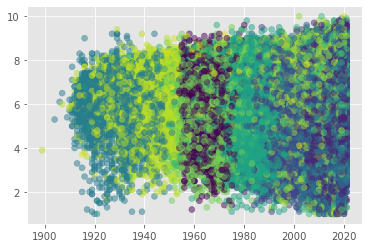

In [22]:
# Plot the data
# startYear vs. averageRating
plt.scatter(movies_list[:,0], movies_list[:,2], c=predictions, alpha=0.5)

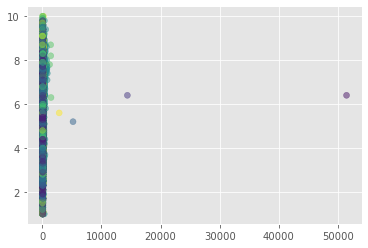

In [23]:
# runtimeMinutes vs. averageRating
plt.scatter(movies_list[:,1], movies_list[:,2], c=predictions, alpha=0.5)

## Explore Cluster # 6

At this point, we have clustered movies into 20 clusters. With our K-means clustering model, we can produce a list of all movies and which cluster they belong to. So, we can take a specific cluster and study the movie characteristics along known dimensions.

Let’s study the movie characteristics of cluster 6.

In [24]:
# What are the commonalities between the movies in cluster 6
# Show movies assigned to Cluster #6
movie_cluster_df = movie_cluster_df.loc[movie_cluster_df['assigned_cluster'] == 5]

movie_cluster_df.shape

(6433, 3)

In [25]:
# Get only the movie ratings records that appear in cluster 6
cluster6_movies_df = ratings_df[ratings_df['titleId'].isin(movie_cluster_df['titleId'])]

# Print movies
cluster6_movies_df

,titleId,averageRating
61679,tt0087167,6.5
62658,tt0088331,7.3
63405,tt0089188,7.4
64031,tt0089916,8.1
64065,tt0089952,7.2
...,...,...
1145671,tt9900388,7.6
1145708,tt9900782,8.4
1145833,tt9905796,5.6
1146001,tt9911306,3.5


In [26]:
# Limit to only movies that are above a 9.0 rating
cluster6_movies_df = cluster6_movies_df.loc[cluster6_movies_df['averageRating'] > 9.0]

In [27]:
print(cluster6_movies_df.shape)

(28, 2)


In [28]:
cluster6_movies_df

,titleId,averageRating
79558,tt0108274,9.3
81949,tt0111161,9.3
455558,tt10327130,9.2
471057,tt10640330,9.1
481276,tt10867504,9.1
495306,tt11137272,9.2
502397,tt11280912,9.1
510816,tt11465650,9.2
511182,tt11474750,9.2
512126,tt11501556,9.4


## Explore Release Years across Clusters

In [29]:
# Get the movie release years for movies watched (titleId) by movies in cluster 

cluster6_movies_watched_df = basics_df[basics_df['titleId'].isin(cluster6_movies_df['titleId'])]

In [30]:
def get_list_of_years(cluster6_movies_watched_df):
    release_list = []
    
    for year in cluster6_movies_watched_df.startYear:
        if year not in release_list: 
            release_list.append(year)
            
    return release_list

release_list = get_list_of_years(cluster6_movies_watched_df)
print("The number of years for Cluster 6: ", len(release_list))
print("The years in Cluster 6", release_list)

The number of years for Cluster 6:  13
The years in Cluster 6 [1995, 1994, 2021, 2019, 2020, 2004, 2005, 2013, 2014, 2016, 2011, 2017, 2015]


In [31]:
# The amount of possible years
print("The amount of total possible years: ", len(get_list_of_years(basics_df)))

The amount of total possible years:  126
